<a href="https://colab.research.google.com/github/hareezzvijey/Zomato-Dataset-Analysis/blob/main/Zomato_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

# Reading Csv

In [7]:
df = pd.read_csv("/content/drive/MyDrive/zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [8]:
df.shape

(51717, 17)

In [9]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [10]:
df = df.drop(['url','address','phone','menu_item','dish_liked','reviews_list'],axis=1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


# Dropping Duplicates

In [12]:
df.drop_duplicates(inplace=True)
df.shape

(51609, 11)

# Cleaning Rate Column

In [13]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [14]:
def handlerate(value):
  if (value=='NEW' or value=='-'):
    return np.nan
  else:
    value = str(value).split("/")
    value = value[0]
    return float(value)

df['rate'] = df['rate'].apply(handlerate)
df['rate'].head()

,rate
0,4.1
1,4.1
2,3.8
3,3.7
4,3.8


In [15]:
df['rate'].isnull().sum()

10019

#Fill The Null Values in Rate column with Mean

In [16]:
df['rate'].fillna(df['rate'].mean(),inplace=True)
df['rate'].isnull().sum()

<ipython-input-16-ecfba8cfc3a0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rate'].fillna(df['rate'].mean(),inplace=True)


0

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51609 non-null  object 
 1   online_order                 51609 non-null  object 
 2   book_table                   51609 non-null  object 
 3   rate                         51609 non-null  float64
 4   votes                        51609 non-null  int64  
 5   location                     51588 non-null  object 
 6   rest_type                    51382 non-null  object 
 7   cuisines                     51564 non-null  object 
 8   approx_cost(for two people)  51265 non-null  object 
 9   listed_in(type)              51609 non-null  object 
 10  listed_in(city)              51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


#Dropping Null Values

In [18]:
df.dropna(inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


#Renaming columns

In [19]:
df.rename(columns={'approx_cost(for two people)':'Cost2Plates', 'listed_in(type)':'type','listed_in(city)':'City'},inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2Plates,type,City
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


#Handling Location

###Both City and location are there,Keep anyone

In [20]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [21]:
df['City'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [22]:
df.drop(['City'],axis=1,inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2Plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


#Handling Cost column

In [23]:
df['Cost2Plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [24]:
def handlecost(value):
  value = str(value)
  if ',' in value:
    value = value.replace(',','')
    value = float(value)
  else:
    value = float(value)
  return value

df['Cost2Plates'] = df['Cost2Plates'].apply(handlecost)
df['Cost2Plates'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [25]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2Plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


#Cleaning Rest_type Column

Making a common group out of Restaurant-types having very few in count  

In [26]:
df['rest_type'].value_counts()

,count
rest_type,
Quick Bites,19010
Casual Dining,10253
Cafe,3682
Delivery,2574
Dessert Parlor,2242
...,...
"Dessert Parlor, Kiosk",2
"Food Court, Beverage Shop",2
"Dessert Parlor, Food Court",2


In [27]:
rest_type = df['rest_type'].value_counts(ascending=False)
rest_type

,count
rest_type,
Quick Bites,19010
Casual Dining,10253
Cafe,3682
Delivery,2574
Dessert Parlor,2242
...,...
"Dessert Parlor, Kiosk",2
"Food Court, Beverage Shop",2
"Dessert Parlor, Food Court",2


###Restaurant type with less 1000 counts

In [28]:
rest_type_lessthan1000 = rest_type[rest_type < 1000]
rest_type_lessthan1000

,count
rest_type,
Beverage Shop,863
Bar,686
Food Court,616
Sweet Shop,468
"Bar, Casual Dining",411
...,...
"Dessert Parlor, Kiosk",2
"Food Court, Beverage Shop",2
"Dessert Parlor, Food Court",2


#Make the resturent type less than 1000 as others

In [29]:
def handle_rest_type(value):
  if (value in rest_type_lessthan1000):
    return 'others'
  else:
    return value

df['rest_type'] = df['rest_type'].apply(handle_rest_type)
df['rest_type'].value_counts()

,count
rest_type,
Quick Bites,19010
Casual Dining,10253
others,9003
Cafe,3682
Delivery,2574
Dessert Parlor,2242
"Takeaway, Delivery",2008
Bakery,1140
"Casual Dining, Bar",1130


# Cleaning Location column

In [30]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2Plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [31]:
df['location'].value_counts()

,count
location,
BTM,5056
HSR,2494
Koramangala 5th Block,2479
JP Nagar,2218
Whitefield,2105
...,...
West Bangalore,6
Yelahanka,5
Jakkur,3


In [32]:
location = df['location'].value_counts(ascending=False)
location

,count
location,
BTM,5056
HSR,2494
Koramangala 5th Block,2479
JP Nagar,2218
Whitefield,2105
...,...
West Bangalore,6
Yelahanka,5
Jakkur,3


###Location having count less than 300

In [38]:
location_lessthan300 = location[location < 300]
location_lessthan300

,count
location,
Koramangala 8th Block,294
Vasanth Nagar,293
Jeevan Bhima Nagar,268
Wilson Garden,246
Bommanahalli,236
Koramangala 3rd Block,215
Thippasandra,191
Kumaraswamy Layout,191
Nagawara,187


In [33]:
def handle_location(value):
  if (value in location_lessthan300):
    return 'others'
  else:
    return value
df['location'] = df['location'].apply(handle_location)
df['location'].value_counts().head(10)

,count
location,
BTM,5056
others,4954
HSR,2494
Koramangala 5th Block,2479
JP Nagar,2218
Whitefield,2105
Indiranagar,2026
Jayanagar,1916
Marathahalli,1805


# Handling cuisines column

In [41]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2Plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


In [50]:
cuisines = df['cuisines'].value_counts()
cuisines_lessthan100 = cuisines[cuisines<100]

def handle_cuisines(value):
  if (value in cuisines_lessthan100):
    return 'others'
  else:
    return value
df['cuisines'] = df['cuisines'].apply(handle_cuisines)
df['cuisines'].value_counts().head(10)


,count
cuisines,
others,26785
North Indian,2852
"North Indian, Chinese",2351
South Indian,1820
Biryani,903
"Bakery, Desserts",898
Fast Food,796
Desserts,754
Cafe,725


In [36]:
df['type'].value_counts()

,count
type,
Delivery,25579
Dine-out,17562
Desserts,3559
Cafes,1703
Drinks & nightlife,1084
Buffet,869
Pubs and bars,686


# **Cleaning process is done**

In [37]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2Plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


#Visualization

###Count Plot for various location

<ipython-input-61-8995e6a73cee>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = df["location"],palette="plasma")


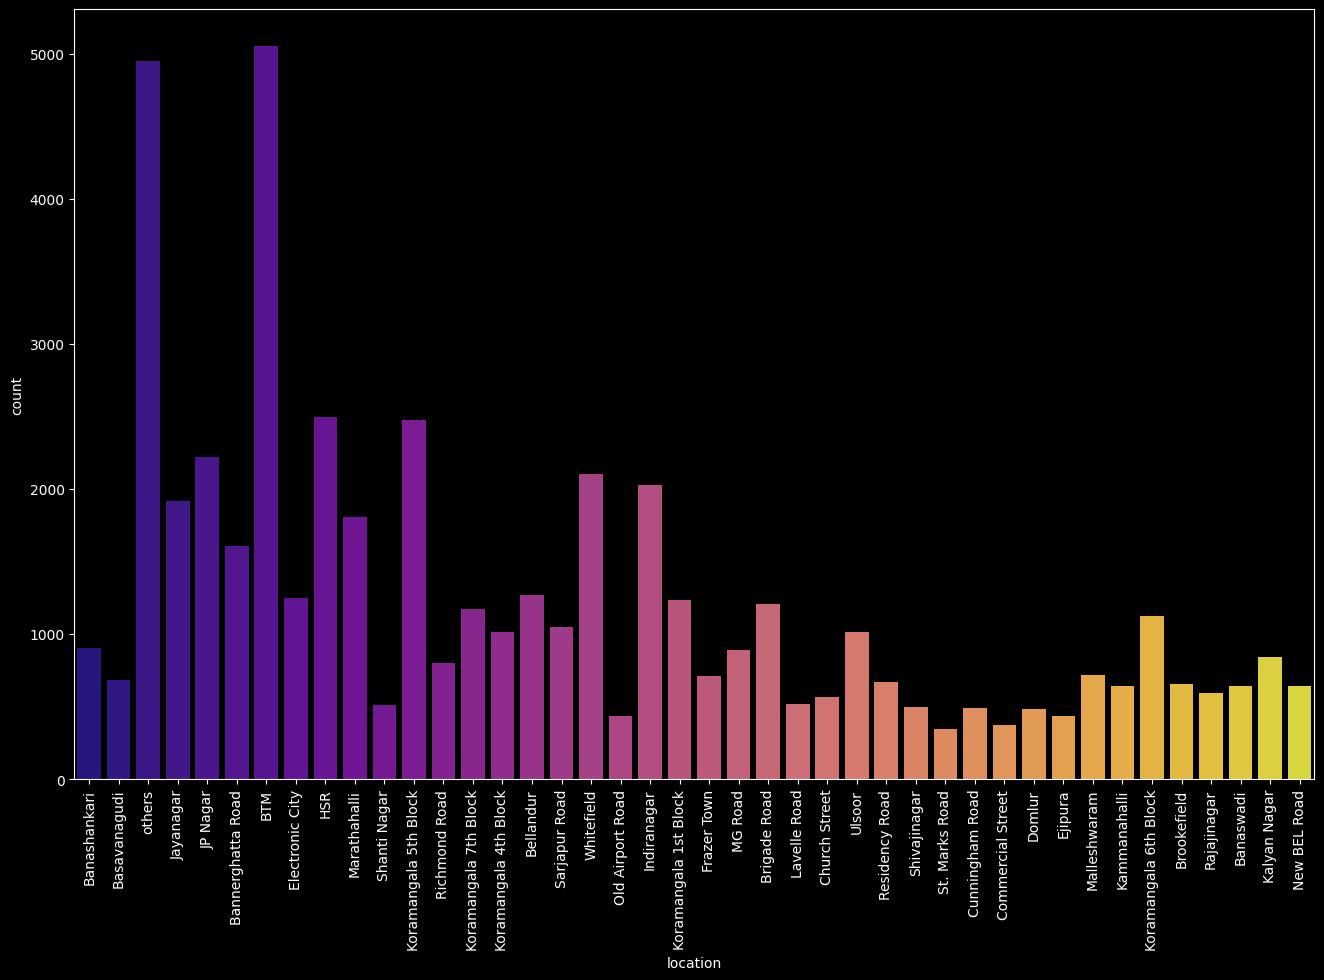

In [61]:
plt.figure(figsize = (16,10))
ax = sns.countplot(x = df["location"],palette="plasma")
plt.xticks(rotation=90)
plt.show()

###Visualizing Online order

<ipython-input-62-3f50a2b94e03>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df["online_order"],palette="plasma")


<Axes: xlabel='online_order', ylabel='count'>

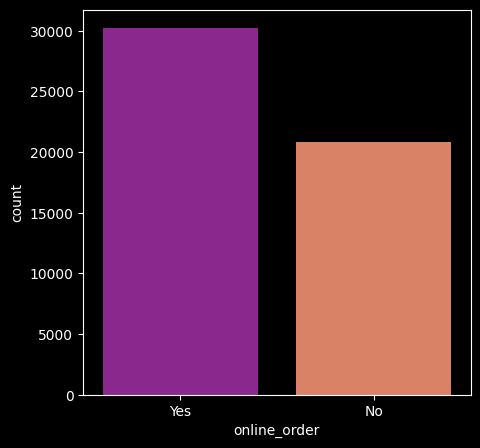

In [62]:
plt.figure(figsize=(5,5))
sns.countplot(x = df["online_order"],palette="plasma")


###Visualizing Book Table

<ipython-input-60-56f80d7afd67>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df["book_table"],palette="coolwarm")


<Axes: xlabel='book_table', ylabel='count'>

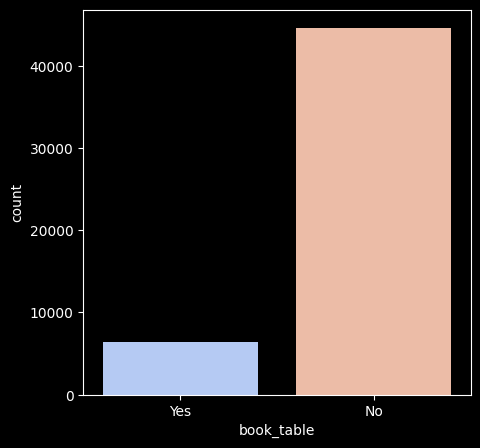

In [60]:
plt.figure(figsize=(5,5))
sns.countplot(x = df["book_table"],palette="coolwarm")

###Visualizing online orders vs Ratings

<ipython-input-63-9b50f06e87e5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["online_order"],y=df["rate"],palette="inferno")


<Axes: xlabel='online_order', ylabel='rate'>

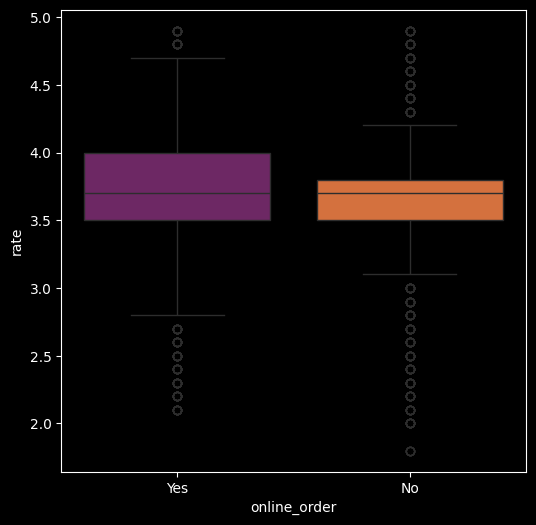

In [63]:
plt.figure(figsize=(6,6))
sns.boxplot(x=df["online_order"],y=df["rate"],palette="inferno")

###Visualizing Book table vs Ratings

<ipython-input-64-520a2d25cb20>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["book_table"],y=df["rate"],palette="inferno")


<Axes: xlabel='book_table', ylabel='rate'>

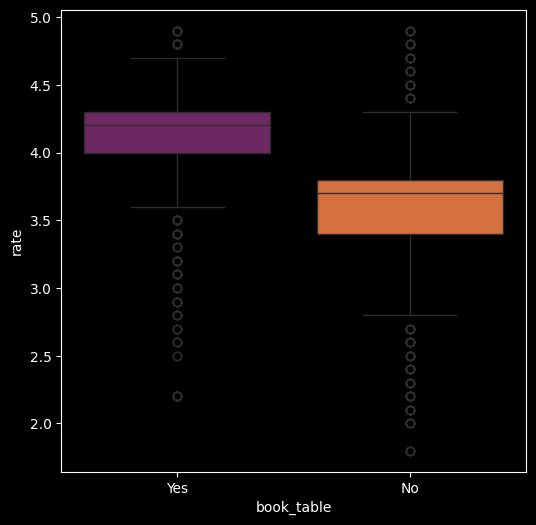

In [64]:
plt.figure(figsize=(6,6))
sns.boxplot(x=df["book_table"],y=df["rate"],palette="inferno")

###Visuailizing Online Order Facility, Location Wise

In [74]:
df1 = df.groupby(['location','online_order'])['name'].count()
df1.to_csv('Location_online.csv')
df1 = pd.read_csv('Location_online.csv')
df1

,location,online_order,name
0,BTM,No,1763
1,BTM,Yes,3293
2,Banashankari,No,397
3,Banashankari,Yes,505
4,Banaswadi,No,302
...,...,...,...
79,Ulsoor,Yes,622
80,Whitefield,No,986
81,Whitefield,Yes,1119
82,others,No,2064


In [78]:
df1 = pd.pivot_table(df1,values=None,index=["location"], columns=["online_order"], fill_value = 0,aggfunc = np.sum)
df1.head()

<ipython-input-78-99d4528b4f81>:1: FutureWarning: The provided callable <function sum at 0x7bbb57be4670> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df1 = pd.pivot_table(df1,values=None,index=["location"], columns=["online_order"], fill_value = 0,aggfunc = np.sum)


name      
online_order         No   Yes
location                     
BTM                1763  3293
Banashankari        397   505
Banaswadi           302   338
Bannerghatta Road   685   924
Basavanagudi        243   441

<Axes: xlabel='location'>

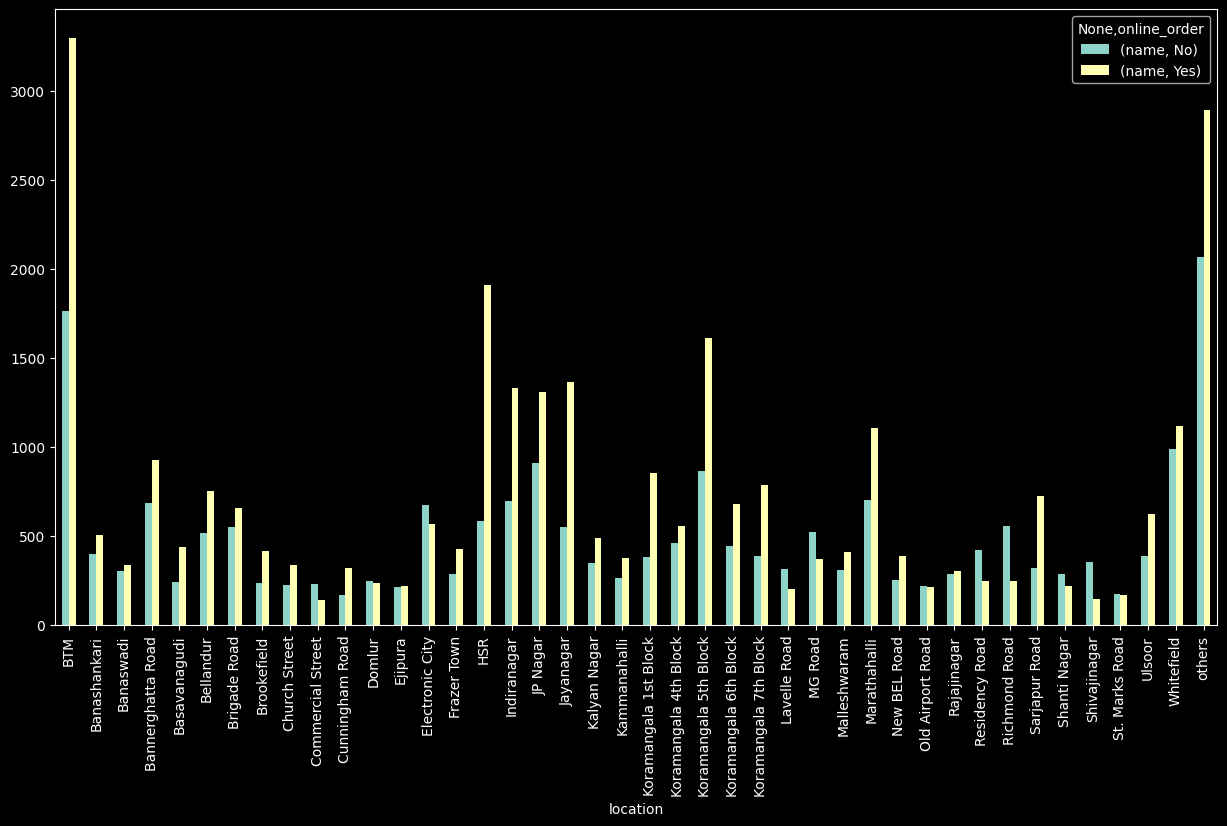

In [81]:
df1.plot(kind='bar',figsize=(15,8))

#Visuailizing Book Table, Location Wise

In [97]:
df2 = df.groupby(['location','book_table'])['name'].count()
df2.to_csv('Location_book.csv')
df2 = pd.read_csv('Location_book.csv')
df2 = pd.pivot_table(df2,values=None,index=["location"], columns=["book_table"], fill_value = 0,aggfunc = np.sum)
df2.head()

<ipython-input-97-082c95e1d83a>:4: FutureWarning: The provided callable <function sum at 0x7bbb57be4670> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df2 = pd.pivot_table(df2,values=None,index=["location"], columns=["book_table"], fill_value = 0,aggfunc = np.sum)


name     
book_table           No  Yes
location                    
BTM                4889  167
Banashankari        839   63
Banaswadi           632    8
Bannerghatta Road  1510   99
Basavanagudi        668   16

<Axes: xlabel='location'>

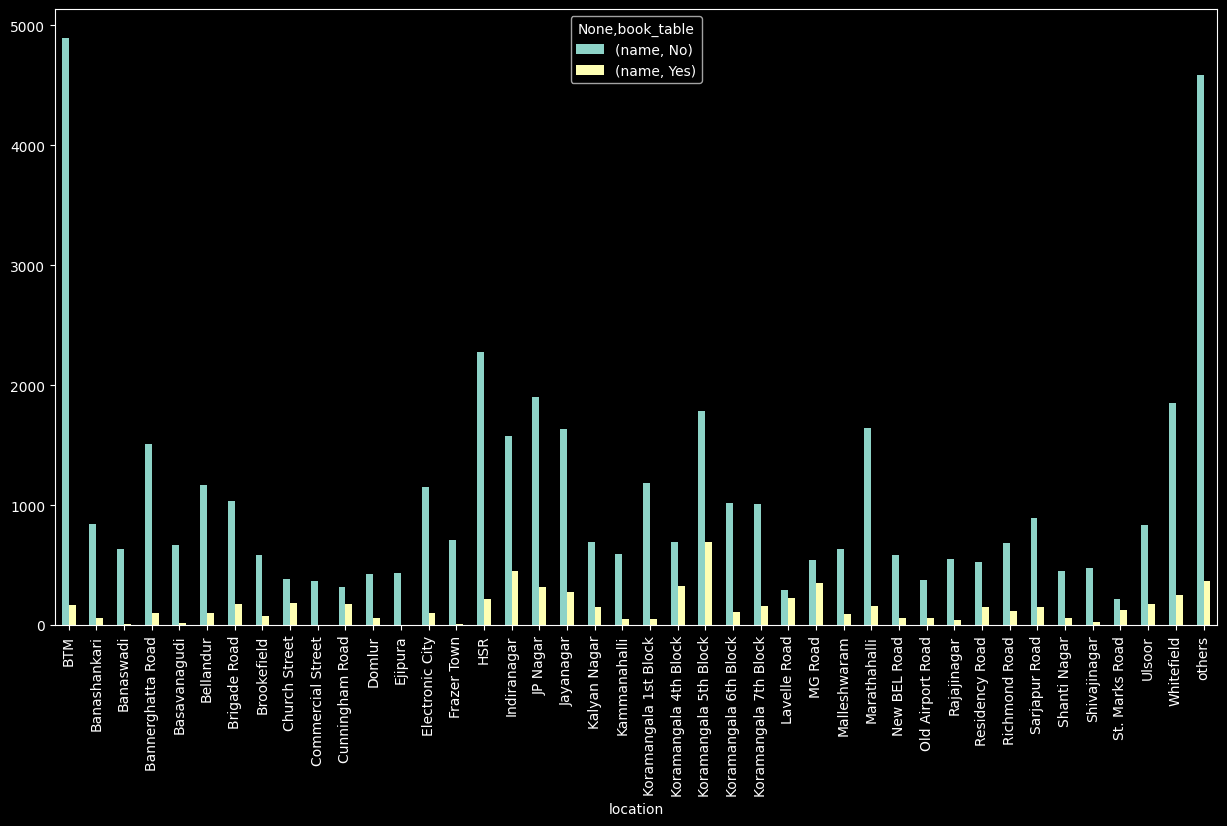

In [98]:
df2.plot(kind="bar",figsize=(15,8))

#Visualize Types of Restaurents vs Rate

<ipython-input-99-7d209885071f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["type"],y=df["rate"],palette="inferno")


<Axes: xlabel='type', ylabel='rate'>

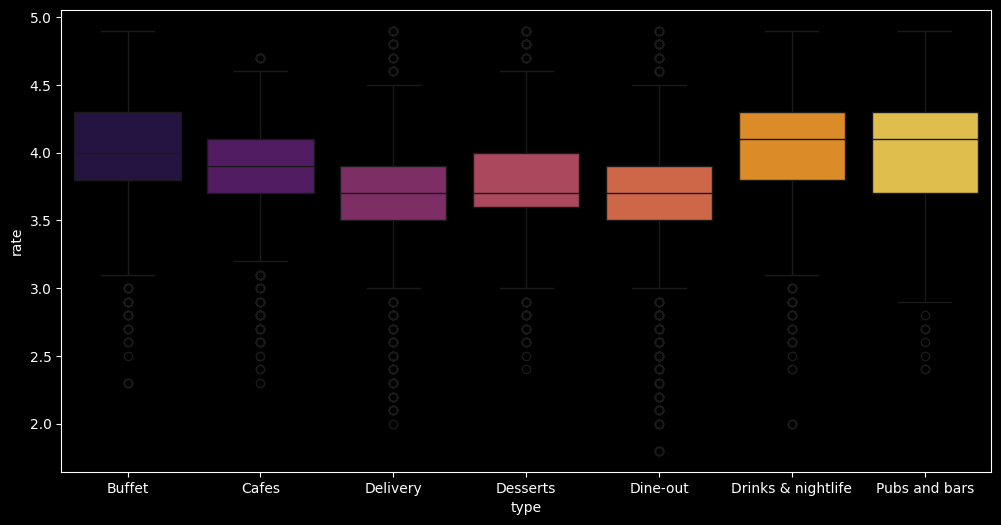

In [99]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df["type"],y=df["rate"],palette="inferno")

#Grouping Types of Restaurents, location wise

In [101]:
df3 = df.groupby(['location','type'])['name'].count()
df3.to_csv("Location_Type.csv")
df3 = pd.read_csv("Location_Type.csv")
df3 = pd.pivot_table(df3,index=["location"],columns=["type"],fill_value=0,aggfunc=np.sum)
df3.head()

<ipython-input-101-d7f159bb103a>:4: FutureWarning: The provided callable <function sum at 0x7bbb57be4670> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3 = pd.pivot_table(df3,index=["location"],columns=["type"],fill_value=0,aggfunc=np.sum)


name                                                      \
type              Buffet Cafes Delivery Desserts Dine-out Drinks & nightlife   
location                                                                       
BTM                   21    83     3053      198     1660                 22   
Banashankari           7    36      418       71      356                 14   
Banaswadi              0    24      310       37      262                  6   
Bannerghatta Road      9    46      828      137      578                  9   
Basavanagudi           7    11      344       66      251                  5   

                                 
type              Pubs and bars  
location                         
BTM                          19  
Banashankari                  0  
Banaswadi                     1  
Bannerghatta Road             2  
Basavanagudi                  0

<Axes: xlabel='location'>

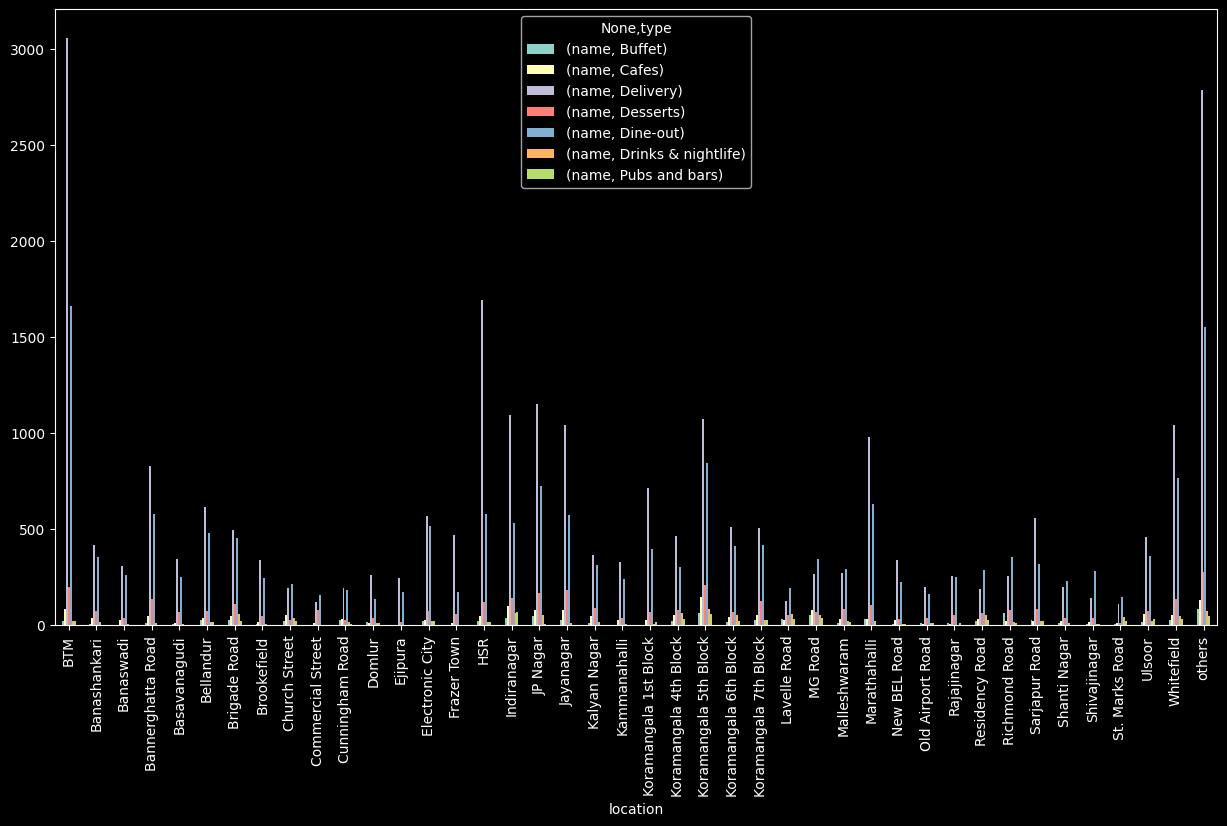

In [102]:
df3.plot(kind="bar",figsize=(15,8))

#No.of Votes, Location Wise

In [117]:
df4 = df[['location','votes']]
df4.drop_duplicates()

df5 = df4.groupby(['location'])['votes'].sum()
df5.to_csv("Location_votes.csv")
# Convert the Series to a DataFrame
df5 = df5.to_frame()
df5 = df5.sort_values('votes',ascending=False)
df5.head()

,votes
location,
Koramangala 5th Block,2214083
Indiranagar,1165909
Koramangala 4th Block,685156
Church Street,590306
JP Nagar,586522


<ipython-input-125-1baf153b1508>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df5['votes'],palette="flare")


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41],
 [Text(0, 0, 'Koramangala 5th Block'),
  Text(1, 0, 'Indiranagar'),
  Text(2, 0, 'Koramangala 4th Block'),
  Text(3, 0, 'Church Street'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'BTM'),
  Text(6, 0, 'others'),
  Text(7, 0, 'HSR'),
  Text(8, 0, 'Lavelle Road'),
  Text(9, 0, 'Koramangala 7th Block'),
  Text(10, 0, 'Jayanagar'),
  Text(11, 0, 'Whitefield'),
  Text(12, 0, 'Koramangala 6th Block'),
  Text(13, 0, 'Marathahalli'),
  Text(14, 0, 'MG Road'),
  Text(15, 0, 'Brigade Road'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Residency Road'),
  Text(18, 0, 'Cunningham Road'),
  Text(19, 0, 'St. Marks Road'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Malleshwaram'),
  Text(22, 0, 'Bannerghatta Road'),
  Text(23, 0, 'Bellandur'),
  Text

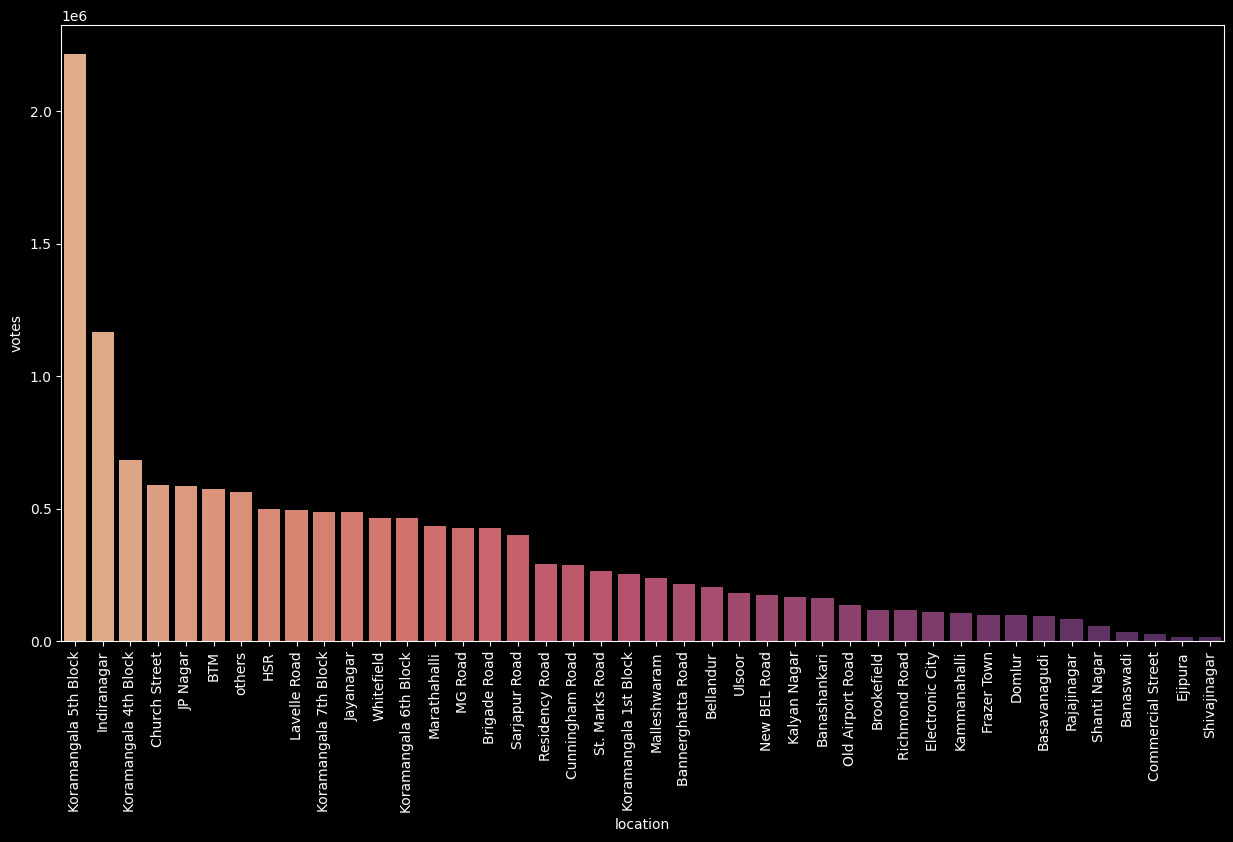

In [125]:
plt.figure(figsize=(15,8))
sns.barplot(df5['votes'],palette="flare")
plt.xticks(rotation=90)

#Visualizing Top Cuisines

In [126]:
df6 = df[['cuisines','votes']]
df6.drop_duplicates()

df7 = df6.groupby(['cuisines'])['votes'].sum()
df7 = df7.to_frame()
df7 = df7.sort_values('votes',ascending=False)
df7.head()

,votes
cuisines,
others,11626964
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706


To remove the others row from cuisine

In [127]:
df7 = df7.iloc[1:,:]
df7.head()

,votes
cuisines,
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706
Chinese,101728


<ipython-input-129-d82ebfcd684d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df7['votes'],palette="flare")


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62],
 [Text(0, 0, 'North Indian'),
  Text(1, 0, 'North Indian, Chinese'),
  Text(2, 0, 'South Indian'),
  Text(3, 0, 'North Indian, Mughlai'),
  Text(4, 0, 'Chinese'),
  Text(5, 0, 'Cafe'),
  Text(6, 0, 'North Indian, South Indian'),
  Text(7, 0, 'Desserts'),
  Text(8, 0, 'Chinese, Momos'),
  Text(9, 0, 'Ice Cream, Desserts'),
  Text(10, 0, 'Cafe, Continental'),
  Text(11, 0, 'Biryani, North Indian, Chinese'),
  Text(12, 0, 'Chinese, Thai, Momos'),
  Text(13, 0, 'South Indian, North Indian, Chinese'),
  Text(14, 0, 'Desserts, Beverages'),
  Text(15, 0, 'Biryani'),
  Text(16, 0, 'Finger Food'),
  Text(17, 0, 'Bakery, Desserts'),


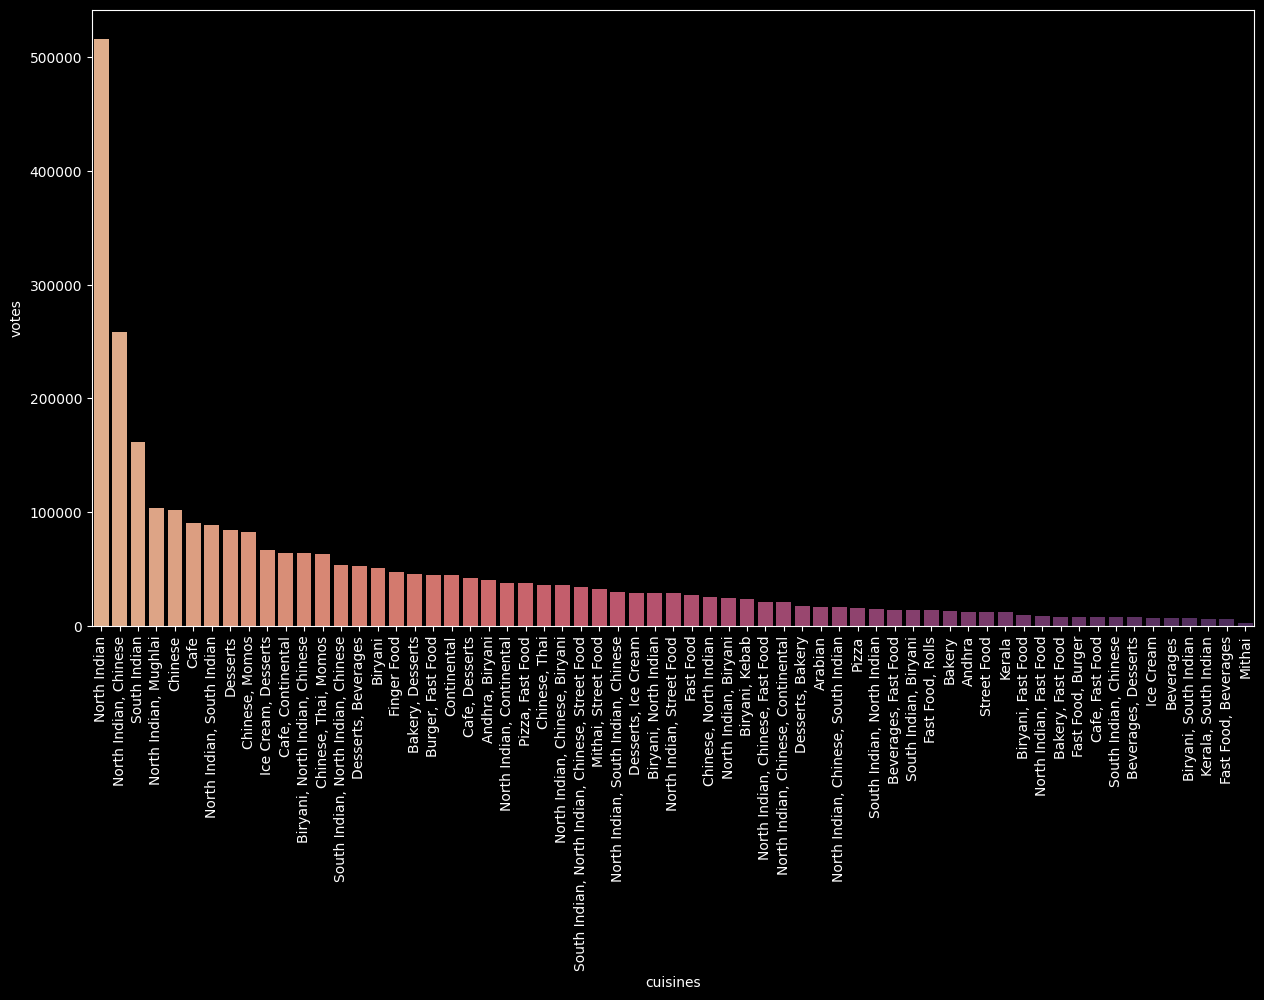

In [129]:
plt.figure(figsize=(15,8))
sns.barplot(df7['votes'],palette="flare")
plt.xticks(rotation=90)